# Classification on MNIST

In [2]:

#Importing needed libraries

import numpy as np
import matplotlib.pyplot as plt
import setuptools.dist
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

# Prepping Data

In [3]:

#Loading
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


#normalizing mnist data
train_images = train_images.reshape((60000, 28*28)) / 255
test_images = test_images.reshape((10000, 28*28)) / 255

# Splitting off calibration data from training data
calibration_size = 10000  # Number of samples for calibration
calibration_images = train_images[:calibration_size]
calibration_labels = train_labels[:calibration_size]

# Updating training data to exclude calibration samples
train_images = train_images[calibration_size:]
train_labels = train_labels[calibration_size:]

#print(len(train_images))
#print(len(test_images))



# Neural network intialization

In [4]:

model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(784,)))

# first hidden layer of 128 neurons (one for each class) with activation function softmax
model.add(layers.Dense(128, activation='relu'))

# second hidden layer of 64 neurons (one for each class) with activation function softmax
model.add(layers.Dense(64, activation='relu'))

# output layer of 10 neurons (one for each class) with activation function softmax
model.add(layers.Dense(10, activation='softmax'))


#model description
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Model training

In [5]:
#compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#training model
batch_size=64
model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(test_images, test_labels))


#saving the model
model.save('mnist_classification_model.h5')


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8397 - loss: 0.5456 - val_accuracy: 0.9533 - val_loss: 0.1592
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9617 - loss: 0.1275 - val_accuracy: 0.9634 - val_loss: 0.1174
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9745 - loss: 0.0841 - val_accuracy: 0.9674 - val_loss: 0.1056
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9804 - loss: 0.0638 - val_accuracy: 0.9735 - val_loss: 0.0871
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.9760 - val_loss: 0.0807
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9866 - loss: 0.0418 - val_accuracy: 0.9734 - val_loss: 0.0972
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9903 - loss: 0.0301 - val_accuracy: 0.9745 - val_loss: 0.0901
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.

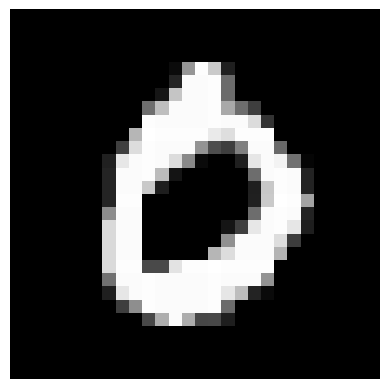

In [6]:
#show image function
def show_image(test_image_index):
    corr_image = test_images[test_image_index].reshape(28,28) 
    plt.imshow(corr_image, cmap='gray')
    plt.axis('off')
    plt.show()

#testing show image function
show_image(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Model prediction: 0
Ground truth:0
Real Image:


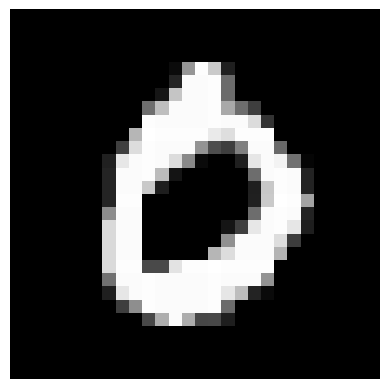

In [7]:
#model prediction on specific test image
from keras.models import load_model
def f_hat(test_image_index):
    model= load_model('mnist_classification_model.h5')
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    f = model.predict(np.expand_dims(test_images[test_image_index],axis=0))
    print("Model prediction: "+str(np.argmax(f[0])))
    print("Ground truth:" + str(test_labels[test_image_index]))
    print("Real Image:")
    show_image(test_image_index)

f_hat(3)